In [250]:
# loading packages

In [251]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [252]:
# loading csv files

In [406]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [407]:
df_test_new = df_test.copy()

In [254]:
#list of columns
df_train.columns.to_list()

['ID',
 'Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [255]:
#droppinf ID column
df_train.drop(["ID"],1,inplace=True)

In [256]:
#printing column names
df_train.columns.to_list()

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [257]:
#getting target variable in Y variable
y_train = df_train[["Claim"]]

In [258]:
#dropping Claim column from input features
df_train.drop(["Claim"],1,inplace=True)

In [259]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of Claim')

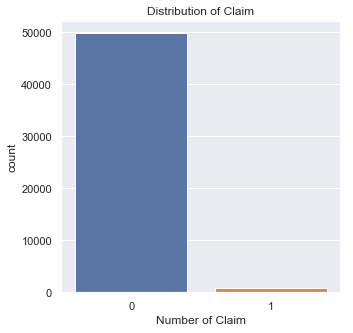

In [260]:
#plot count plot of Claim variable
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Claim", data=y_train)
plt.title('Distribution of Claim')
plt.xlabel('Number of Claim')

In [261]:
# bylooking count plot we can see that there is clss imbalance in dataset

In [262]:
# train data size
df_train.shape

(50553, 10)

In [263]:
#dataypes
df_train.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [264]:
# types of datatypes
set(df_train.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [265]:
# distributing int flot and Object columns
df_train_int = df_train.select_dtypes(include = ['int64', 'float64'])
df_train_Object = df_train.select_dtypes(include = object)

In [178]:
#columns
df_train_int.columns.tolist()

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [179]:
# there are only 4 np.Number column

In [180]:
# chaecking null values for int column
df_train_int.isnull().sum()

Duration                0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [181]:
#there are no null vlaues in null columns
df_train_int['Claim'] = y_train

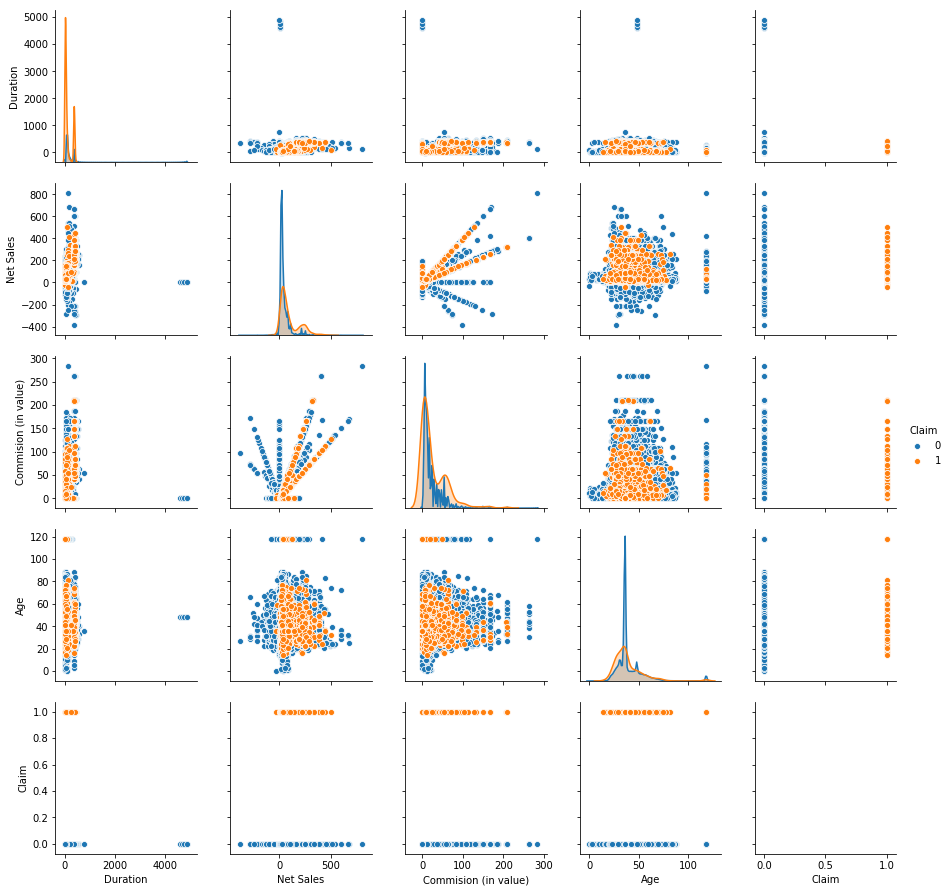

In [108]:
sns.pairplot(df_train_int, hue="Claim")

Observations from pair plot wrt claim column <br>
1) for All values of duration above ~ 800 all claims are rejected<br>
2) for net sales value less than ~ 0 all claims are rejected<br>
3) for age less than ~ 10 all claims are rejected<br>

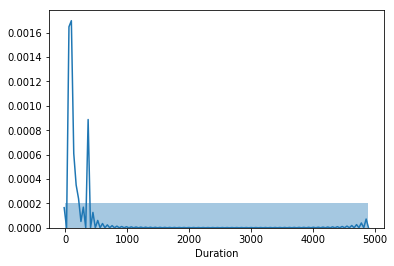

In [110]:
# histogram for distribution plot
sns.distplot(df_train_int["Duration"], bins=1)

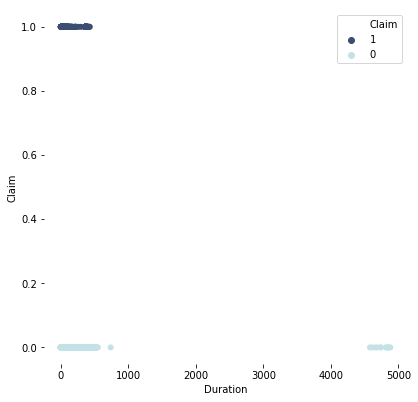

In [182]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Duration", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [183]:
# all claims above ~800 rejected
df_train_int.loc[df_train_int["Duration"] >= 740, ['Duration']] = 740

In [184]:
# duration is time period thats why it can not be negative
df_train_int.loc[df_train_int["Duration"] <= 0, ['Duration']] = 0

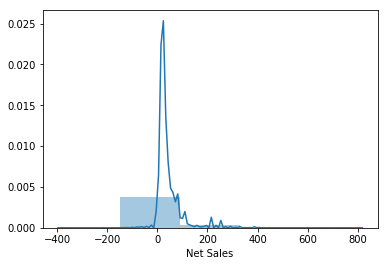

In [185]:
# histogram for net sales plot
sns.distplot(df_train_int["Net Sales"], bins=5)

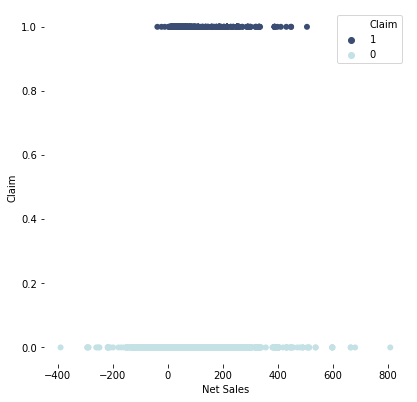

In [186]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Net Sales", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [187]:
# for all the values below ~-20 all the claims are rejected
df_train_int.loc[df_train_int["Net Sales"] <= -20, ['Net Sales']] = -20

In [188]:
# for all the values above ~550 all the claims are rejected
df_train_int.loc[df_train_int["Net Sales"] >= 550, ['Net Sales']] = 550

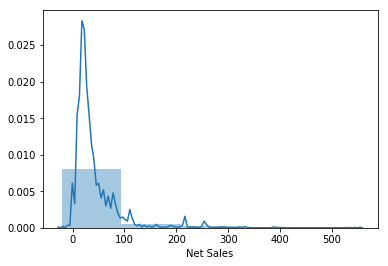

In [192]:
# histogram for net sales plot
sns.distplot(df_train_int["Net Sales"], bins=5)

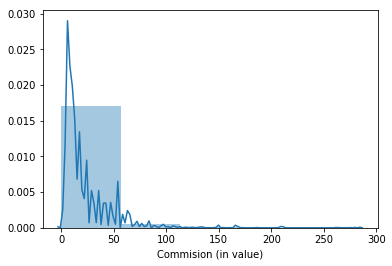

In [191]:
# histogram for net sales plot
sns.distplot(df_train_int["Commision (in value)"], bins=5)

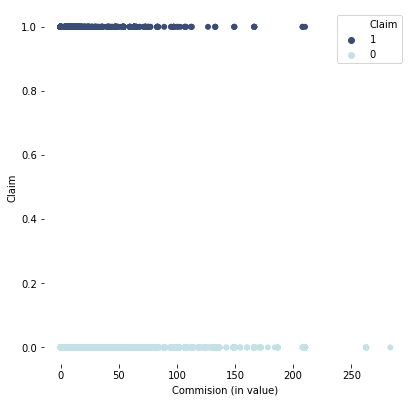

In [194]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Commision (in value)", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [195]:
# for all Commision above ~220 all the claims are rejeted
df_train_int.loc[df_train_int["Commision (in value)"] >= 220, ['Commision (in value)']] = 220

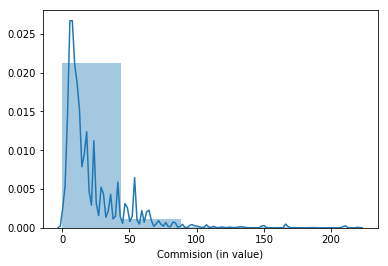

In [196]:
# histogram for net sales plot
sns.distplot(df_train_int["Commision (in value)"], bins=5)

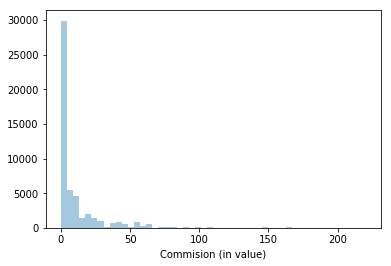

In [200]:
ax = sns.distplot(df_train_int["Commision (in value)"],kde = False)

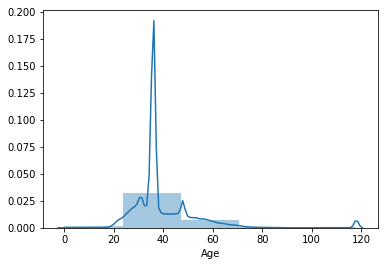

In [201]:
# histogram for net sales plot
sns.distplot(df_train_int["Age"], bins=5)

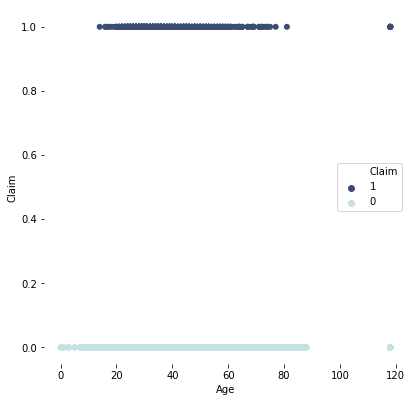

In [202]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Age", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [203]:
# age below less than ~15 all claims are rejected
df_train_int.loc[df_train_int["Age"] <= 15, ['Age']] = 15

In [204]:
# age below less than ~15 all claims are rejected
df_train_int.loc[df_train_int["Age"] >= 85, ['Age']] = 85

In [205]:
# eda for int variable is over

In [266]:
# eda for categorical variable
df_train_Object['Claim'] = y_train

In [207]:
# check for null values
df_train_Object.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Destination                 0
Gender                  35953
Claim                       0
dtype: int64

In [208]:
# only gender column has null values

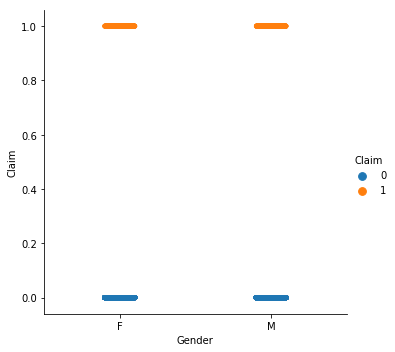

In [213]:
#cat plot
sns.catplot(x="Gender", y="Claim", hue="Claim", data=df_train_Object);

In [215]:
# perccenttage of missing data for gender
df_train_Object["Gender"].isnull().sum()/(df_train_Object["Gender"].count() + df_train_Object["Gender"].isnull().sum())

0.7111941922338931

In [269]:
# 71 % data is missing in fender column
# since its categorical column lets remove it with mode value
df_train_Object["Gender"].fillna(df_train_Object["Gender"].mode()[0], inplace=True)

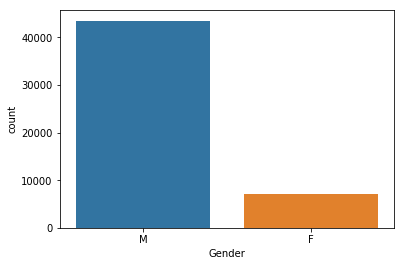

In [219]:
# count plot for Gender
sns.countplot(data = df_train_Object, x = 'Gender')

In [228]:
sns.set(rc={'figure.figsize':(10.7,10.27)})

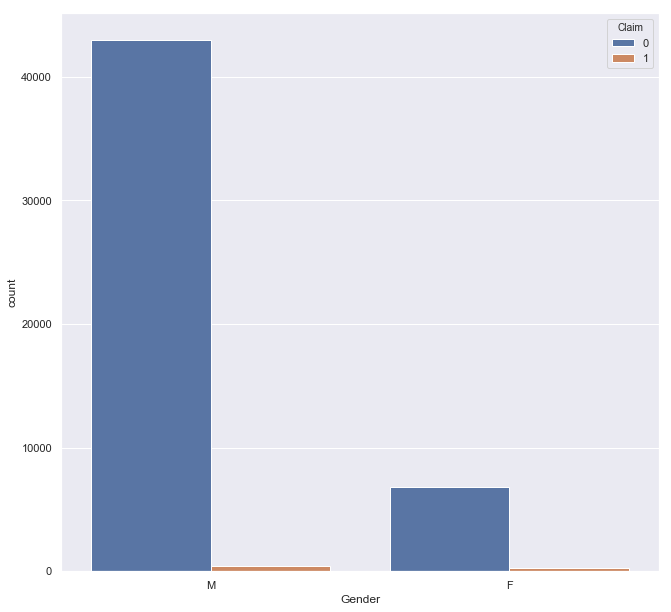

In [230]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Gender', hue='Claim')

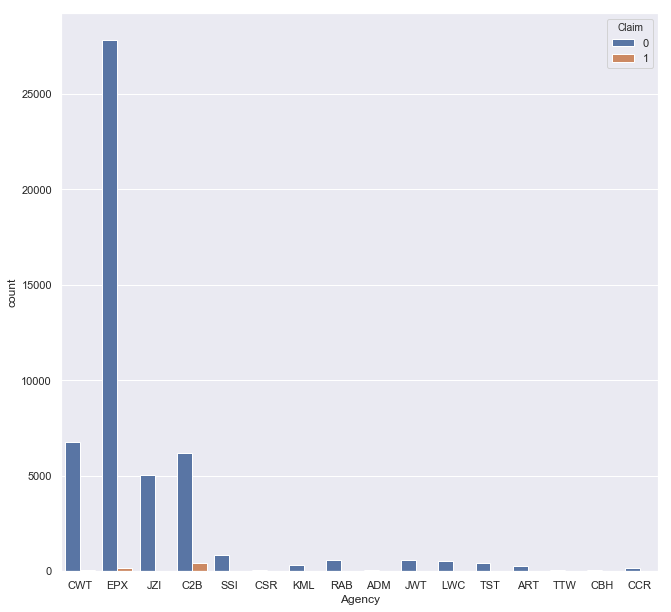

In [231]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Agency', hue='Claim')

In [232]:
# from above plot we can conclude that agency is not related with claim

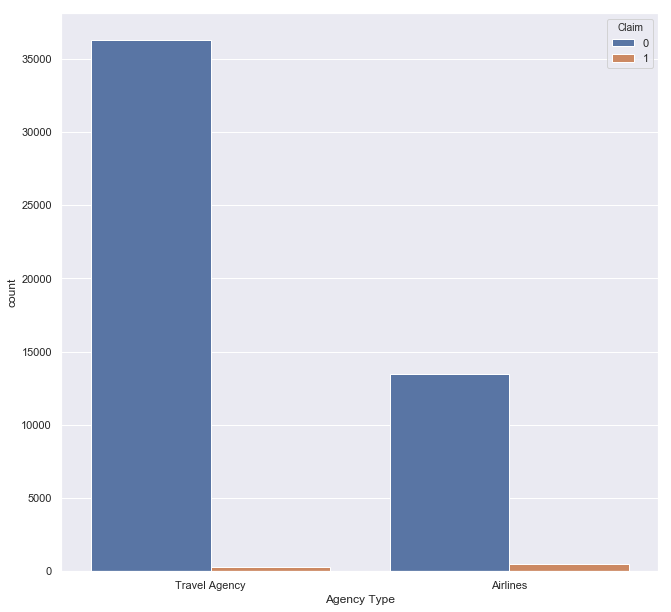

In [233]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Agency Type', hue='Claim')

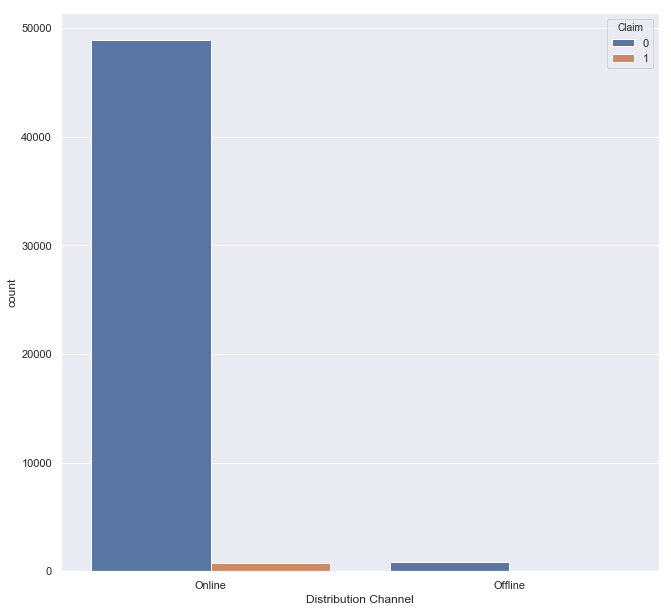

In [234]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Distribution Channel', hue='Claim')

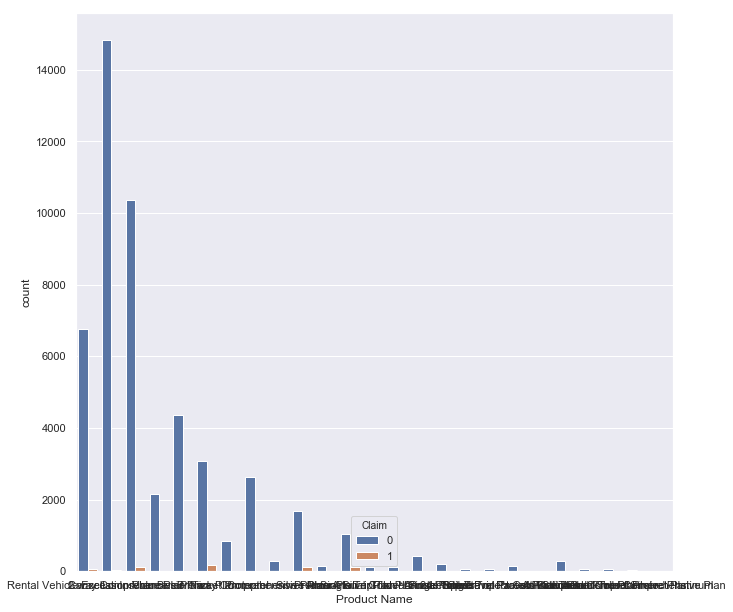

In [235]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Product Name', hue='Claim')

In [237]:
# claim is also not dependent on Product Name

In [245]:
sns.set(rc={'figure.figsize':(200.7,50.27)})

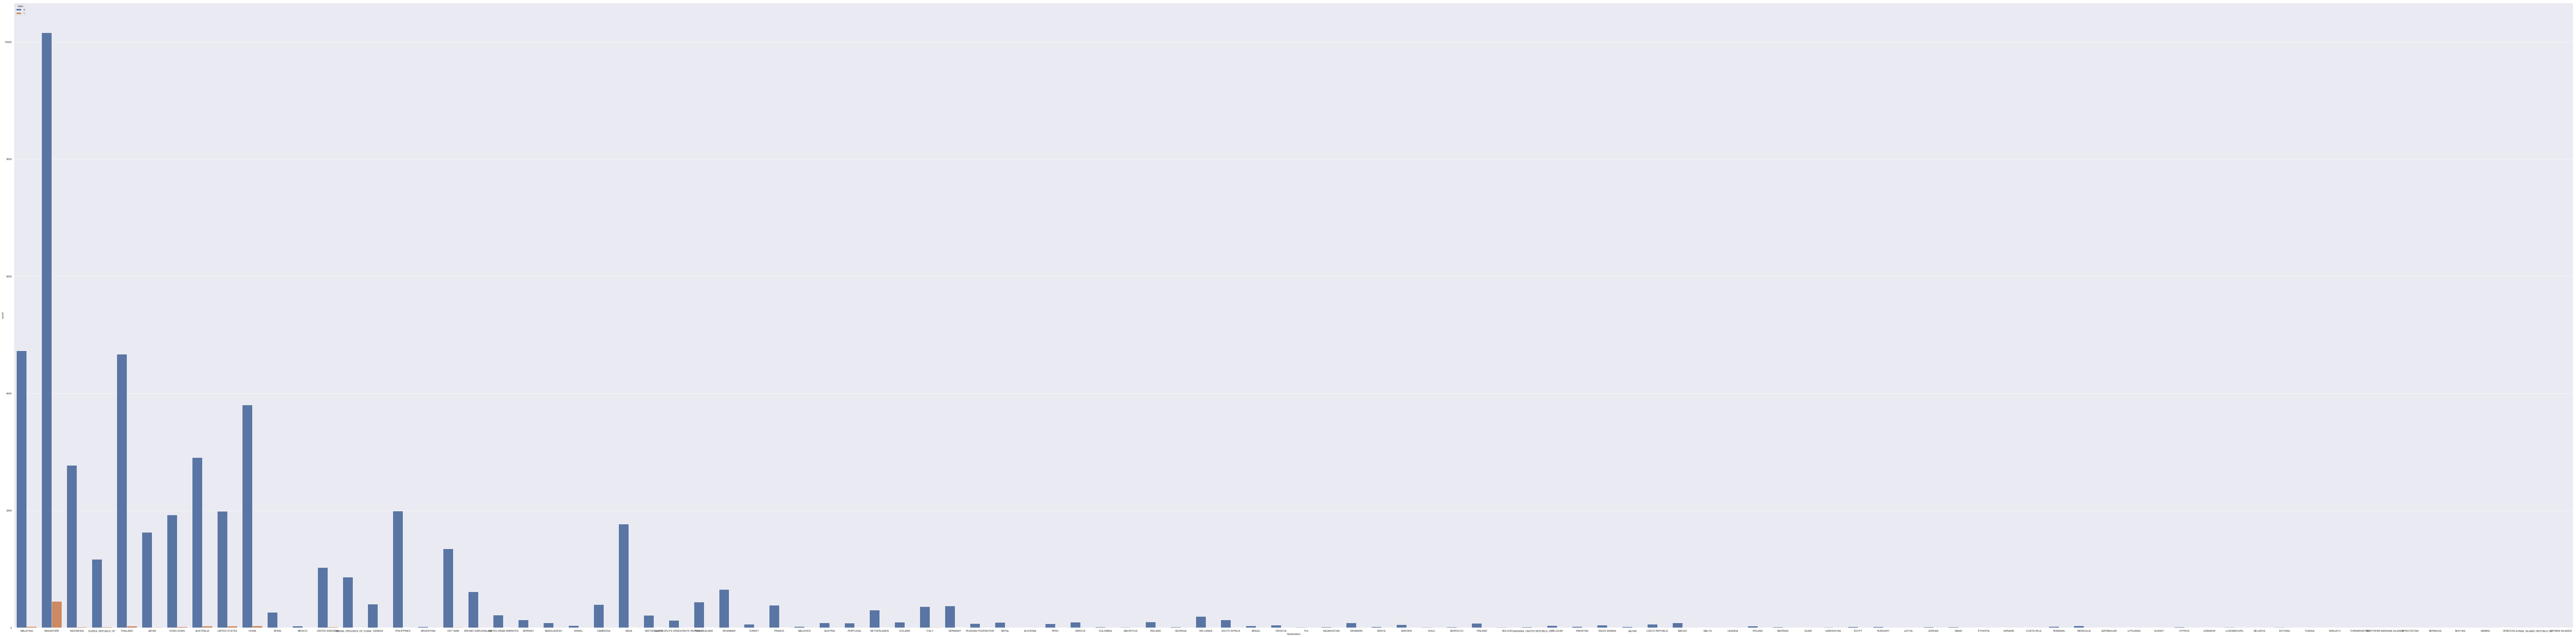

In [246]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Destination', hue='Claim')

In [247]:
# claim is also not dependent on the Destination

In [267]:
df_object_remove = ["Destination", "Product Name", "Agency"]
df_train_Object.drop(df_object_remove,1,inplace=True)

In [271]:
df_train_Object.head()

,Agency Type,Distribution Channel,Gender,Claim
0,Travel Agency,Online,M,0
1,Travel Agency,Online,M,0
2,Travel Agency,Online,M,0
3,Travel Agency,Online,M,0
4,Travel Agency,Online,M,0


In [298]:
df_train_Object["Gender"].unique()

array(['M', 'F'], dtype=object)

In [303]:
le = LabelEncoder()

In [332]:
le.fit(df_train_new["Gender"])

LabelEncoder()

In [333]:
df_train_new["Gender"] = le.transform(df_train_new["Gender"])

In [334]:
le.fit(df_train_new["Agency Type"])
df_train_new["Agency Type"] = le.transform(df_train_new["Agency Type"])
le.fit(df_train_new["Distribution Channel"])
df_train_new["Distribution Channel"] = le.transform(df_train_new["Distribution Channel"])

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
scaler = StandardScaler()

In [327]:
df_train_new.head()

,Agency Type,Distribution Channel,Gender,Duration,Net Sales,Commision (in value),Age
0,Travel Agency,Online,M,7,0.0,17.82,31
1,Travel Agency,Online,M,85,69.0,0.00,36
2,Travel Agency,Online,M,11,19.8,11.88,75
3,Travel Agency,Online,M,16,20.0,0.00,32
4,Travel Agency,Online,M,10,15.0,0.00,29


In [275]:
#install imbalance
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\singh\anaconda3\lib\site-packages (0.5.0)


In [323]:
from imblearn.over_sampling import SMOTE

In [324]:
sm = SMOTE(random_state=42)

In [326]:
df_train_new = pd.concat([df_train_Object, df_train_int],1)

In [329]:
df_train_new.iloc[:,3:7] = scaler.fit_transform(df_train_new.iloc[:,3:7])

In [335]:
df_train_new.head()

,Agency Type,Distribution Channel,Gender,Duration,Net Sales,Commision (in value),Age
0,1,1,1,-0.418263,-0.834389,0.400903,-0.640165
1,1,1,1,0.350712,0.576677,-0.494132,-0.284961
2,1,1,1,-0.378829,-0.429475,0.102558,2.485628
3,1,1,1,-0.329535,-0.425385,-0.494132,-0.569124
4,1,1,1,-0.388687,-0.527636,-0.494132,-0.782247


In [336]:
X_res, y_res = sm.fit_resample(df_train_new, y_train)

In [340]:
len(X_res)

99624

In [366]:
#handling test data
df_test.columns.tolist()

['ID',
 'Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [408]:
#drop ID
df_test.drop(["ID"],1, inplace=True)

In [409]:
# all claims above ~800 rejected
df_test.loc[df_test["Duration"] >= 740, ['Duration']] = 740
df_test.loc[df_test["Duration"] <= 0, ['Duration']] = 0

In [410]:
# for all the values below ~-20 all the claims are rejected
df_test.loc[df_test["Net Sales"] <= -20, ['Net Sales']] = -20
df_test.loc[df_test["Net Sales"] >= 550, ['Net Sales']] = 550

In [411]:
# for all Commision above ~220 all the claims are rejeted
df_test.loc[df_test["Commision (in value)"] >= 220, ['Commision (in value)']] = 220

In [412]:
# age below less than ~15 all claims are rejected
df_test.loc[df_test["Age"] <= 15, ['Age']] = 15
df_test.loc[df_test["Age"] >= 85, ['Age']] = 85

In [413]:
# 71 % data is missing in fender column
# since its categorical column lets remove it with mode value
df_test["Gender"].fillna(df_test["Gender"].mode()[0], inplace=True)

In [414]:
df_object_remove = ["Destination", "Product Name", "Agency"]
df_test.drop(df_object_remove,1,inplace=True)

In [415]:
le.fit(df_test["Gender"])
df_test["Gender"] = le.transform(df_test["Gender"])
le.fit(df_test["Agency Type"])
df_test["Agency Type"] = le.transform(df_test["Agency Type"])
le.fit(df_test["Distribution Channel"])
df_test["Distribution Channel"] = le.transform(df_test["Distribution Channel"])

In [416]:
df_test.iloc[:,2:5] = scaler.fit_transform(df_test.iloc[:,2:5])

In [417]:
df_test.iloc[:,6:] = scaler.fit_transform(df_test.iloc[:,6:])

In [418]:
df_test.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Gender,Age
0,1,1,0.136226,0.186813,1.030038,1,0.673813
1,1,1,-0.596287,-0.438300,-0.500852,1,-1.348369
2,1,1,0.271877,-0.438300,-0.500852,1,-0.293318
3,1,1,-0.094380,-0.268778,-0.500852,1,-0.293318
4,1,1,-0.433507,-0.629012,-0.500852,1,-0.293318


In [351]:
# apply machine learning algorithms

In [352]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

In [344]:
from sklearn.neighbors import KNeighborsClassifier

In [345]:
from sklearn.model_selection import train_test_split as tts

In [346]:
X_train, X_test, y_train, y_test = tts(X_res, y_res, test_size=0.33, random_state=42)

In [445]:
# apply grid search cv
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9036379121547633
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     16476
           1       0.87      0.94      0.91     16400

    accuracy                           0.90     32876
   macro avg       0.91      0.90      0.90     32876
weighted avg       0.91      0.90      0.90     32876

0.9037327465226583


In [453]:
# predicting testing data
y_pred = rfc.predict(df_test)

In [455]:
generatecsv("sample_submission_knn",y_pred)

In [444]:
# apply grid search cv
knn = KNeighborsClassifier()
param = {"n_neighbors":np.arange(1,2,1), "metric":['minkowski', 'euclidean','cosine']}
knn_cv = GridSearchCV(estimator=knn, param_grid=param, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.best_estimator_.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

AttributeError: 'KNeighborsClassifier' object has no attribute 'best_estimator_'

In [348]:
from sklearn.ensemble import RandomForestClassifier

In [349]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)

In [419]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))
print (rfc.oob_score_)

0.9608224844871639
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     16476
           1       0.97      0.95      0.96     16400

    accuracy                           0.96     32876
   macro avg       0.96      0.96      0.96     32876
weighted avg       0.96      0.96      0.96     32876

0.9608087743295496
0.942500149817223


In [420]:
df_test.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Gender,Age
0,1,1,0.136226,0.186813,1.030038,1,0.673813
1,1,1,-0.596287,-0.438300,-0.500852,1,-1.348369
2,1,1,0.271877,-0.438300,-0.500852,1,-0.293318
3,1,1,-0.094380,-0.268778,-0.500852,1,-0.293318
4,1,1,-0.433507,-0.629012,-0.500852,1,-0.293318


In [424]:
# predicting testing data
y_pred = rfc.predict(df_test)

In [430]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [451]:
def generatecsv(filename,y_pred):
    y_pred_df = pd.DataFrame(y_pred,columns=['Claim'])
    y_pred_df['Claim'] = y_pred_df['Claim'].astype(int)
    random_csv_df = pd.concat([df_test_new['ID'], y_pred_df],1)
    random_csv_df.to_csv(filename+'.csv', index=False)